<a href="https://colab.research.google.com/github/viktor1181/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
%matplotlib inline 

In [2]:
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


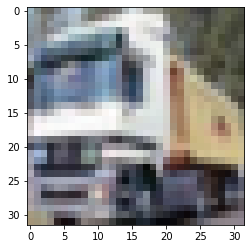

Номер класса: [9]
Тип объекта: грузовик


In [4]:
n = 1
plt.imshow(X_train[n])
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])

In [5]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [9]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
# Второй слой подвыборки
#model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.5))

model.add(Conv2D(128, (7, 7), padding='same', activation='relu'))
model.add(Conv2D(128, (7, 7), activation='relu'))
model.add(BatchNormalization())
# Второй слой подвыборки
#model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.6))

# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        2

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=25,
              validation_split=0.1,
              shuffle=True,
              verbose=1)

Epoch 1/25
352/352 [==============================] - 56s 69ms/step - loss: 2.7480 - accuracy: 0.2876 - val_loss: 4.7383 - val_accuracy: 0.1866
Epoch 2/25
352/352 [==============================] - 23s 65ms/step - loss: 1.4376 - accuracy: 0.4850 - val_loss: 1.0898 - val_accuracy: 0.6144
Epoch 3/25
352/352 [==============================] - 23s 65ms/step - loss: 1.2207 - accuracy: 0.5675 - val_loss: 0.9593 - val_accuracy: 0.6538
Epoch 4/25
352/352 [==============================] - 23s 65ms/step - loss: 1.0622 - accuracy: 0.6265 - val_loss: 0.9332 - val_accuracy: 0.6826
Epoch 5/25
352/352 [==============================] - 23s 65ms/step - loss: 0.9438 - accuracy: 0.6716 - val_loss: 0.8265 - val_accuracy: 0.7186
Epoch 6/25
352/352 [==============================] - 23s 64ms/step - loss: 0.8781 - accuracy: 0.6970 - val_loss: 0.9983 - val_accuracy: 0.6896
Epoch 7/25
352/352 [==============================] - 23s 65ms/step - loss: 0.8134 - accuracy: 0.7212 - val_loss: 0.7445 - val_accuracy:

In [12]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 80.99%


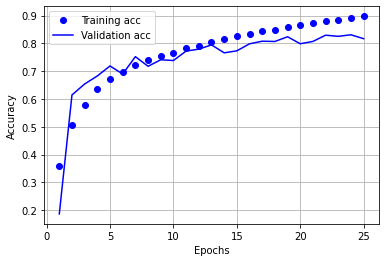

In [13]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

TypeError: ignored

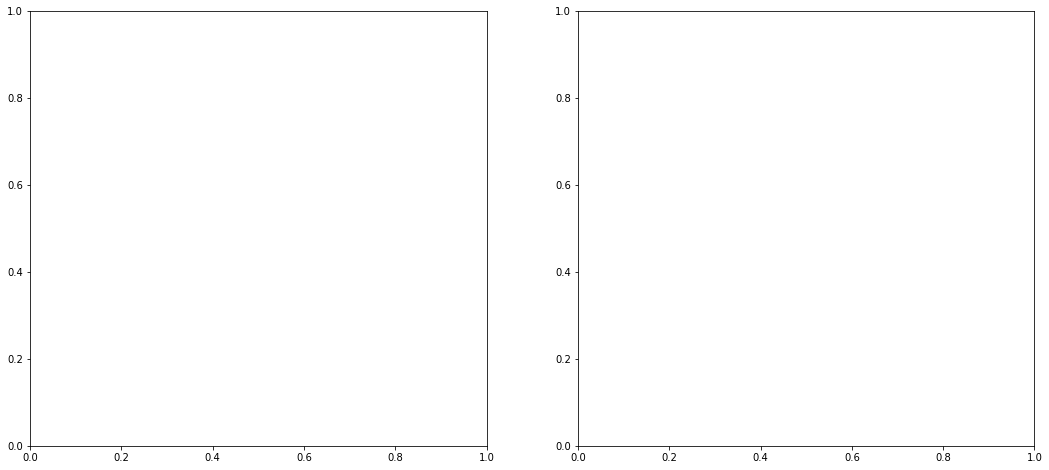

In [16]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
f,ax=plt.subplots(1,2,figsize=(18,8))
ax[0][0].plot(epochs, loss_values)
ax[0][1].plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.show()

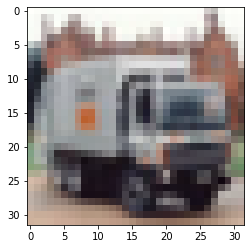

In [ ]:
index=11
plt.imshow(X_test[index])
plt.show()

In [ ]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

In [ ]:
prediction = model.predict(x)

In [ ]:
print(prediction)

[[1.7015606e-11 9.3794987e-04 1.5676325e-14 1.6831599e-13 1.1607262e-19
  1.2493000e-16 8.7592494e-20 1.1125851e-14 5.4748950e-10 9.9906212e-01]]


**Запускаем распознавание**

In [ ]:
prediction = np.argmax(prediction)
print(classes[prediction])

грузовик


In [ ]:
print(classes[y_test[index][0]])

грузовик


In [ ]:
outputs = [layer.output for layer in model.layers]          # all layer outputs
outputs

[<KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 16, 16, 32) dtype=float32 (created by layer 'dropout_3')>,
 <KerasTensor: shape=(None, 16, 16, 64) dtype=float32 (created by layer 'conv2d_5')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'max_pooling2d_3')>,
 <KerasTensor: shape=(None, 8, 8, 64) dtype=float32 (created by layer 'dropout_4')>,
 <KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'flatten_1')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense_2')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dropout_5')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_3')>]

In [ ]:
from keras.models import Model

layer_name = 'conv2d_3'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(X_test)

In [ ]:
np.shape(intermediate_output)

(10000, 32, 32, 32)

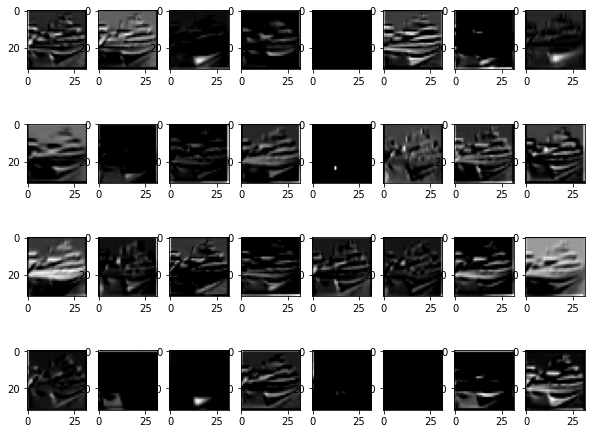

In [ ]:
row_size=4
col_size=8
img_index=0

fig,ax=plt.subplots(row_size,col_size,figsize=(10,8))

for row in range(0,row_size):
  for col in range(0,col_size):
    ax[row][col].imshow(intermediate_output[1, :, :, img_index], cmap='gray')
    img_index=img_index+1